In [1]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors

In [2]:
url = 'https://raw.githubusercontent.com/ddbbh9/funk-a-dunk/main/hate_crime_small.csv'

In [3]:
df = pd.read_csv(url)
df.head()

,DATA_YEAR,STATE_NAME,REGION_NAME,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_BIAS
0,1991,Arkansas,South,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S
1,1991,Arkansas,South,1,Black or African American,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S
2,1991,Arkansas,South,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S
3,1991,Arkansas,South,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S
4,1991,Arkansas,South,1,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S


In [4]:
def emptyMatrix(rows, cols):
    matrix = []

    for row in range(rows):
        l = []
        for col in range(cols):
            l.append(0.0)
        
        matrix.append(l)
    
    return matrix

In [5]:
def getSize(matrix):
    size = []
    row_count = 0
    cols_count = 0

    for row in matrix:
        row_count += 1

    for i in row:
        cols_count += 1

    size.append(row_count)
    size.append(cols_count)
    
    return size

In [6]:
def importValues(matrix, url, header1,header2):
  size = getSize(matrix)
  df = pd.read_csv(url)

  container = []
  
  for i in range(10):
        dbl = []
        a = int(df[header1][i])
        b = int(df[header2][i])
        if (0 <= a < size[0]) and (0 <= b < size[1]):
            dbl.append(a)
            dbl.append(b)
        else:
            continue
        container.append(dbl)

  for i in range(len(container)):
      matrix[container[i][0]][container[i][1]] = 1.0

        

  return matrix

In [7]:
def GetNeighbors(matrix,size,r,c):

    e1 = 0
    e2 = 0
    e3 = 0
    e4 = 0
    e5 = 0
    e6 = 0
    e7 = 0
    e8 = 0

    if(c-1 >= 0):
        e1 = matrix[r][c-1]

    if((r-1 >= 0)and(c-1 >= 0)):
        e2 = matrix[r-1][c-1]

    if(r-1 >= 0):
        e3 = matrix[r-1][c]

    if((r-1>=0)and(c+1<size[1])):
        e4 = matrix[r-1][c+1]

    if(c+1<size[1]):
        e5 = matrix[r][c+1]

    if((c+1<size[1])and(r+1<size[0])):
        e6 = matrix[r+1][c+1]

    if(r+1<size[0]):
        e7 = matrix[r+1][c]

    if((r+1<size[0])and((c-1 >= 0))):
        e8 = matrix[r+1][c-1]

    s = e1 + e2 + e3 + e4 + e5 + e6 + e7 + e8

    return s

def update(matrix):
    output = copy.deepcopy(matrix)
    size = getSize(matrix)

    for row in range(size[0]):
        for col in range(size[1]):
            s = GetNeighbors(matrix,size,row,col)
            if matrix[row][col] == 1.0:
                if s < 2.0:
                    output[row][col] = 0.0
                elif s == 2.0 or s == 3.0:
                    output[row][col] = 1.0
                elif s > 3.0:
                    output[row][col] = 0.0
            elif matrix[row][col] == 0.0:
                if s == 3.0:
                    output[row][col] = 1.0
    
    return output

In [8]:
x_dim = 25
y_dim = 25

e_m = emptyMatrix(x_dim, y_dim)
e_m = importValues(e_m, url, 'TOTAL_OFFENDER_COUNT','TOTAL_INDIVIDUAL_VICTIMS',)

final = update(e_m)


In [9]:
#INPUT:
# a frameNumber
# a matplotlib AxesImage object
# a 2D matrix (Notably this can be a 3D matrix as well with individual colors as RGBs)
#OUTPUT:
# a matplotlib AxesImage object containing the updated matrix
def updateFig(frameNum, img, matrix):
    # The first frame should be the actual input dataset, not the first update step.
    if (frameNum == 0):
        return img    

    # NOTE: If you are making a gif for part 2, you will probably want to replace this
    # The main point is that you need to both update matrix and img with the new frame
    nm = update(matrix)
    
    matrix[:] = nm[:]

    img.set_data(nm)

    return img

#INPUT:
# a 2D matrix (Notably this can be a 3D matrix as well with individual colors as RGBs)
# an integer storing the number of steps
# a string storing the path and filename of the file to be written
#OUTPUT:
# None
# Instead an image or gif is saved to the location specified by outname
def animate(matrix, steps, outname):
    matrix = np.array(matrix)
    
    # NOTE: If you change these two lines you can adjust the color and bin sizes
    # This is only relevant for part 2 -- this code is not used or graded by the autograder
    cmap = colors.ListedColormap(['black', 'pink', 'red']) 
    bounds = [0, 1, 2, 3]


    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    plt.grid(False)
    img = ax.imshow(matrix, cmap=cmap, norm=norm)
    ani = animation.FuncAnimation(fig, updateFig, fargs=(img, matrix), frames=steps)


    ani.save(outname, fps=2)

[gif @ 0x55ae4fff9580] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: ignored

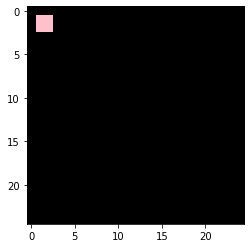

In [12]:
animate(e_m, 10, 'cs277.gif')